In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

import matplotlib.pyplot as plt

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


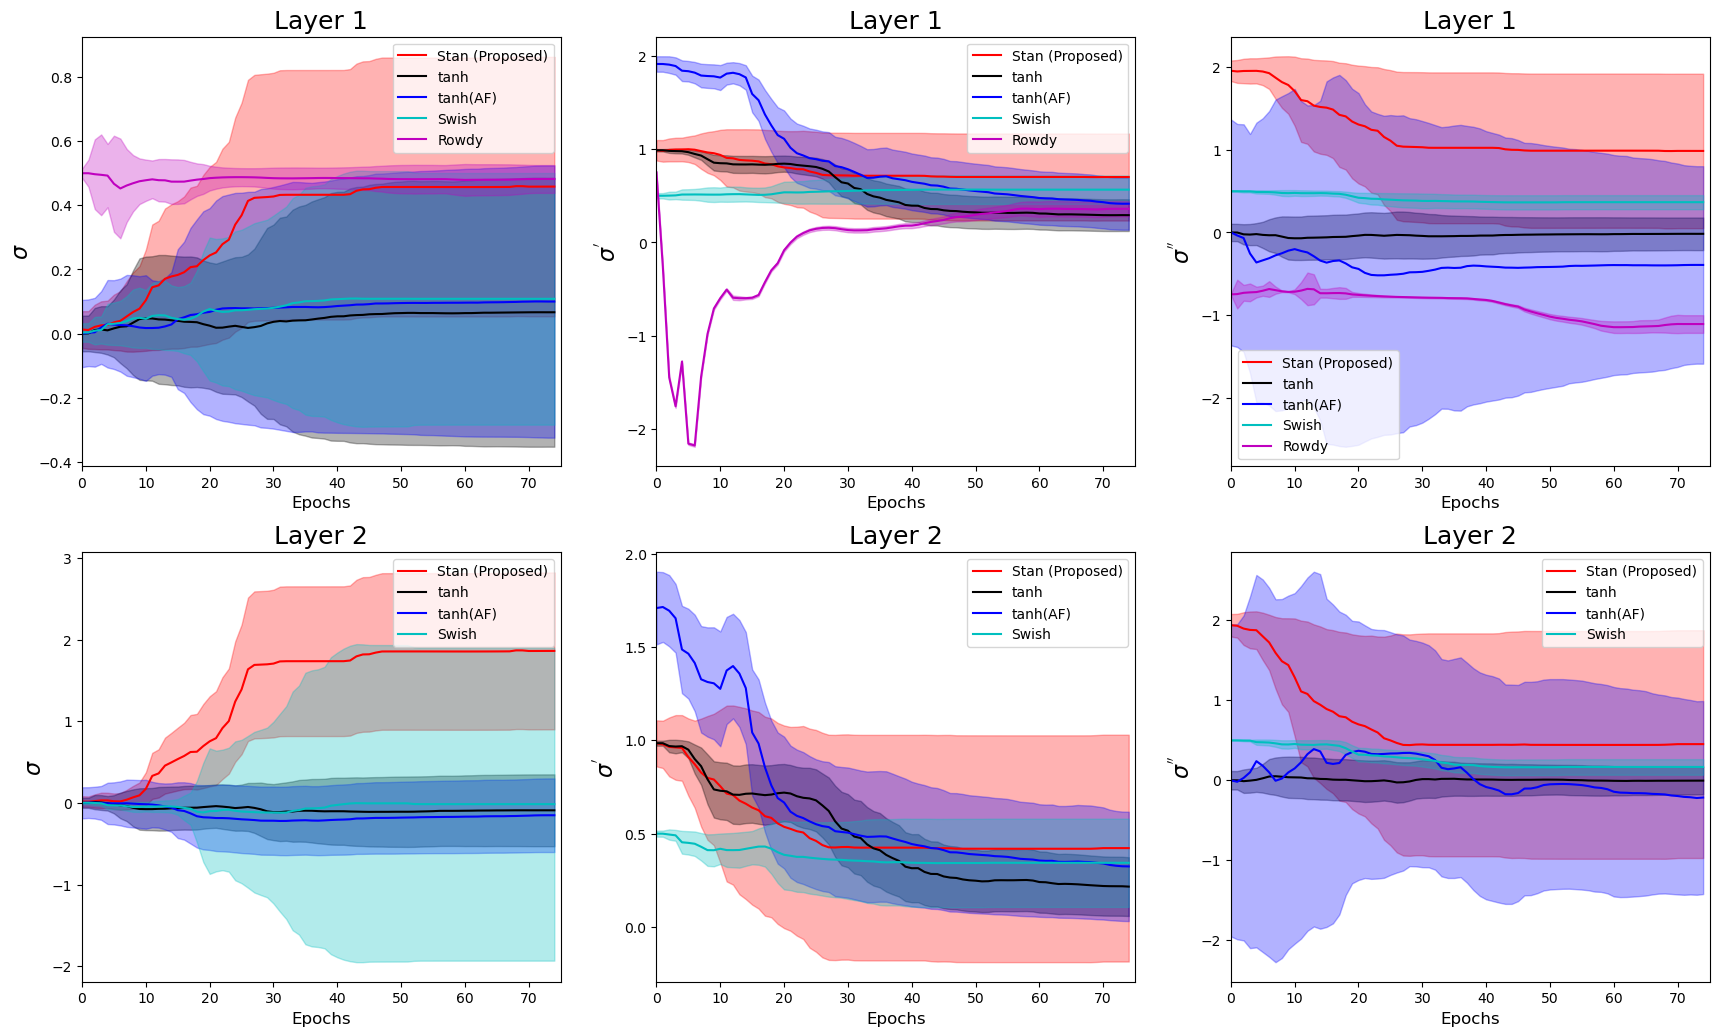

In [2]:
algos = ['stan','tanh','atanh','swish','rowdy']
algo_labels = ['Stan (Proposed)','tanh','tanh(AF)','Swish','Rowdy']

layer_num = 1

max_steps = 75

colors = ['r','k','b','c','m']

fig,axs = plt.subplots(2,3)

y_labels = ['$\sigma$','$\sigma^{\'}$','$\sigma^{\'\'}$']

for layer_num in range(0,2):
    for j in range(3):
        deriv_num = j
        ax = axs[layer_num,j]
        for i in range(5):
            if(i==4 and layer_num ==1 ):
                 continue

            dat = scipy.io.loadmat('k_'+algos[i]+'.mat')
            k_mean =  dat['k_mean']
            k_std =  dat['k_std']

            ax.plot(range(0,75),k_mean[:,layer_num,deriv_num],colors[i],label = algo_labels[i])
            fb = ax.fill_between(range(0,75),k_mean[:,layer_num,deriv_num] - 0.5*k_std[:,layer_num,deriv_num],k_mean[:,layer_num,deriv_num] + 0.5*k_std[:,layer_num,deriv_num],alpha=0.3)
            fb.set_color(colors[i])
            ax.set_xlim([0,75])
            ax.figure.set_size_inches(21,5)



        ax.set_xlabel('Epochs',fontsize=12,alpha = 1)
        ax.set_ylabel(y_labels[j],fontsize=16,alpha = 1)
        ax.legend()   
        ax.set_title("Layer "+str(layer_num+1),fontsize=18)
        
fig.subplots_adjust(top = 2.0)   
# fig.savefig('Deriv_plots.pdf', format='pdf', bbox_inches='tight')

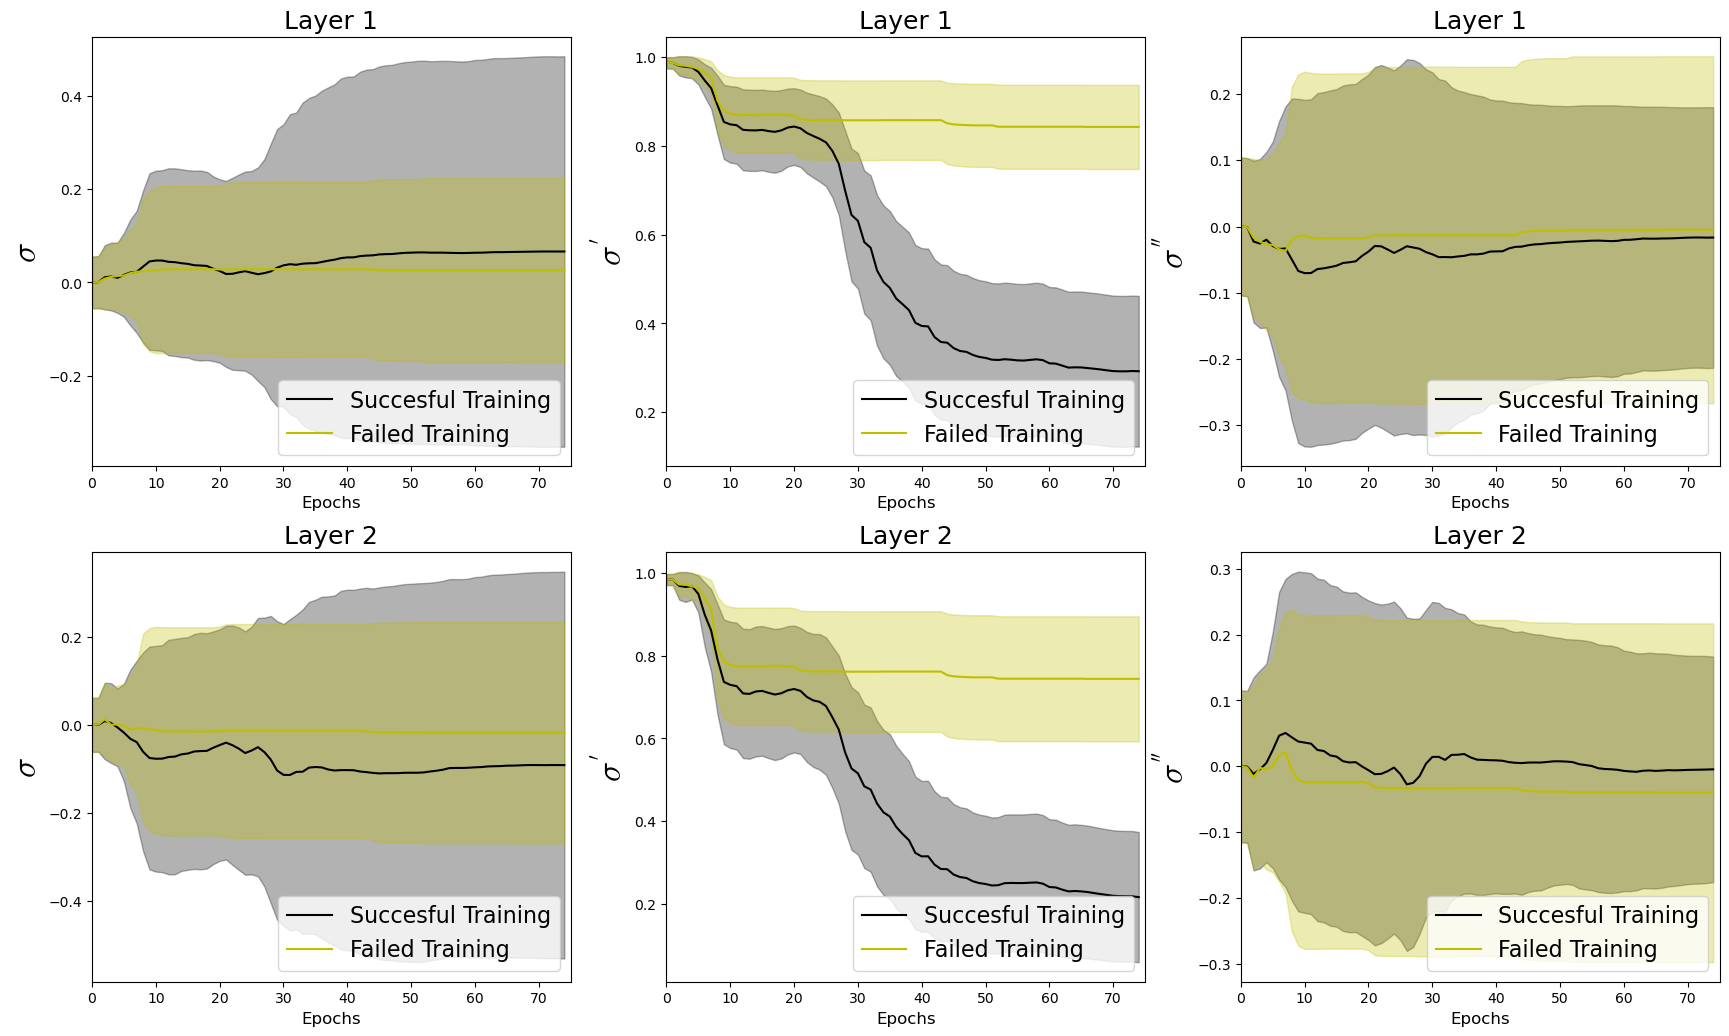

In [5]:
algos = ['tanh','tanh_failed']
algo_labels = ['Succesful Training','Failed Training']

layer_num = 1

max_steps = 75

colors = ['k','y']

fig,axs = plt.subplots(2,3)

y_labels = ['$\sigma$','$\sigma^{\'}$','$\sigma^{\'\'}$']

for layer_num in range(0,2):
    for j in range(3):
        deriv_num = j
        ax = axs[layer_num,j]
        for i in range(2):

            dat = scipy.io.loadmat('k_'+algos[i]+'.mat')
            k_mean =  dat['k_mean']
            k_std =  dat['k_std']

            ax.plot(range(0,75),k_mean[:,layer_num,deriv_num],colors[i],label = algo_labels[i])
            fb = ax.fill_between(range(0,75),k_mean[:,layer_num,deriv_num] - 0.5*k_std[:,layer_num,deriv_num],k_mean[:,layer_num,deriv_num] + 0.5*k_std[:,layer_num,deriv_num],alpha=0.3)
            fb.set_color(colors[i])
            ax.set_xlim([0,75])
            ax.figure.set_size_inches(21,5)



        ax.set_xlabel('Epochs',fontsize=12,alpha = 1)
        ax.set_ylabel(y_labels[j],fontsize=24,alpha = 1,math_fontfamily='cm')
        ax.legend(loc = 4,prop={'size': 16})   
        ax.set_title("Layer "+str(layer_num+1),fontsize=18)
        
fig.subplots_adjust(top = 2.0)   
# fig.savefig('Deriv_plots_success_fail.pdf', format='pdf', bbox_inches='tight')
fig.savefig('Deriv_plots_success_fail.svg', format='svg', bbox_inches='tight')